In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(6)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))
minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))
print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


In [3]:
stats.ttest_1samp(a = minnesota_ages,popmean = population_ages.mean())  

TtestResult(statistic=np.float64(-2.5742714883655027), pvalue=np.float64(0.013118685425061678), df=np.int64(49))

In [4]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

np.float64(2.0095752371292397)

In [5]:
stats.t.cdf(x= -2.5742,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test

np.float64(0.013121066545690117)

In [6]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size
stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate

(np.float64(36.36966907692507), np.float64(42.150330923074925))

In [7]:
stats.t.interval(confidence=0.99,           # Confidence level (renamed from alpha)
                 df=49,                     # Degrees of freedom
                 loc=minnesota_ages.mean(), # Sample mean
                 scale=sigma)               # Standard error of the mean


(np.float64(35.40547994092107), np.float64(43.11452005907893))

In [8]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))
print( wisconsin_ages.mean() )
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

42.8


TtestResult(statistic=np.float64(-1.7083870793286842), pvalue=np.float64(0.09073104343957748), df=np.float64(97.9724575497005))

In [9]:
np.random.seed(11)
before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})
weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [10]:
stats.ttest_rel(a = before,
                b = after)

TtestResult(statistic=np.float64(2.5720175998568284), pvalue=np.float64(0.011596444318439859), df=np.int64(99))

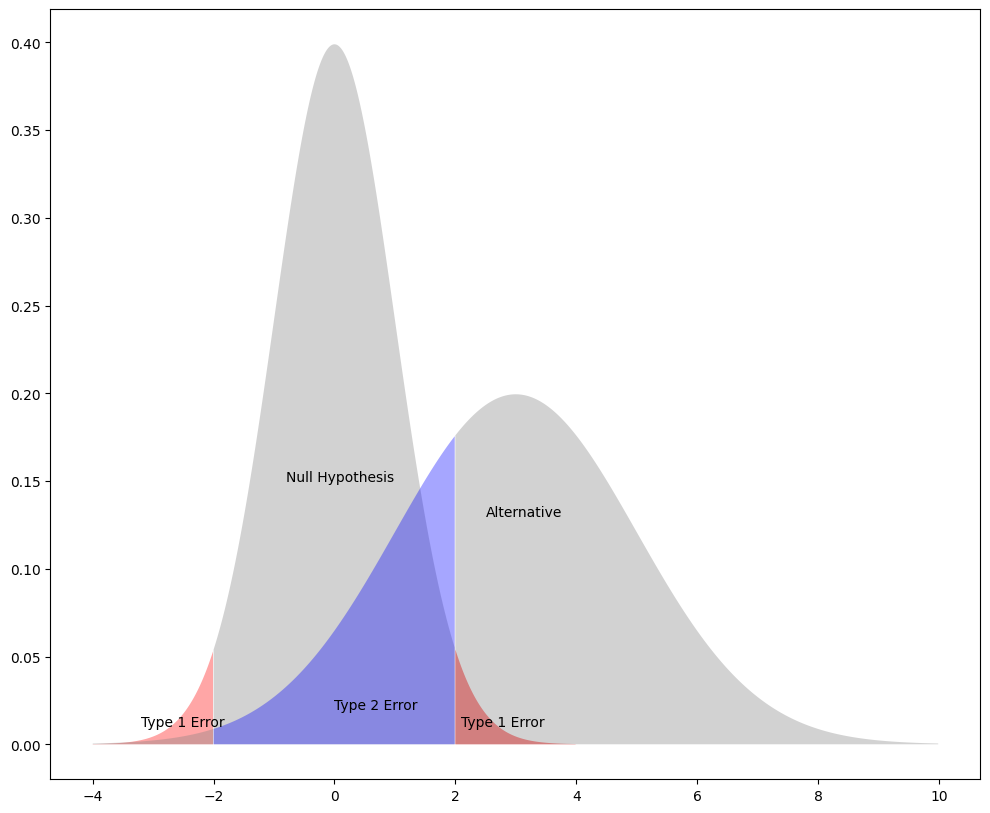

In [11]:
plt.figure(figsize=(12,10))
plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)
plt.fill_between(x=np.arange(2,4,0.01),
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)
plt.fill_between(x=np.arange(-4,-2,0.01),
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)
plt.fill_between(x=np.arange(-2,2,0.01),
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)
plt.fill_between(x=np.arange(2,10,0.01),
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)
plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

In [12]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value
 # Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,
                     loc=3,
                     scale=2)
 # Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile,
                      loc=3,
                      scale=2)
 # Area under the alternative, between the cutoffs (Type II error)
high-low

np.float64(0.294956061112323)